In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
def vis_data(data, xticklabels, yticklabels):
    
    fig = plt.plot()
    
    sns.heatmap(data, annot=True, fmt='.0f',
                xticklabels=xticklabels, 
                yticklabels=yticklabels)
    
    plt.ylabel('# particles')
    plt.tight_layout()
    plt.show()

In [3]:
def format_extra_data_PF(data, max_iter=1000, n_steps_kidnap=5):
    n_ns_particles = data.shape[1]

    n_no_converge = np.zeros((n_ns_particles))
    n_no_reset = np.zeros((n_ns_particles))
    n_no_reconverge = np.zeros((n_ns_particles))
    
    for i in range(data.shape[1]):
        
        data_ = data[:, i, :]
        
        ## Count number of runs that did not converge
        n_no_converge[i] = (data_[:, 0] == max_iter).sum()
        
        ## Count number of runs that did not reconverge
        n_no_reconverge[i] = ((data_[:, 0] + data_[:, 2]) >= max_iter - 1).sum()
        
        ## Count number of runs that did not reset belief after being kidnapped
        n_no_reset[i] = (data_[:, 1] < 0).sum()
        
    data_extra = np.zeros((n_ns_particles, 3))
    data_extra[:, 0] = n_no_converge
    data_extra[:, 1] = n_no_reset
    data_extra[:, 2] = n_no_reconverge
    
    return data_extra

In [19]:
def format_extra_data_KF(data, max_iter=1000, n_steps_kidnap=5):

    n_no_converge = (data[:, 0] == max_iter).sum()
    n_no_reset = (data[:, 1] < 0).sum()
    n_no_reconverge = ((data[:, 0] + data[:, 2]) >= max_iter - 1).sum()
        
    data_extra = np.zeros((1, 3))
    data_extra[:, 0] = n_no_converge
    data_extra[:, 1] = n_no_reset
    data_extra[:, 2] = n_no_reconverge
    
    return data_extra

In [5]:
data_PF = np.load('PF_n1000.npy')
print(data_PF.shape)

(1000, 6, 3)


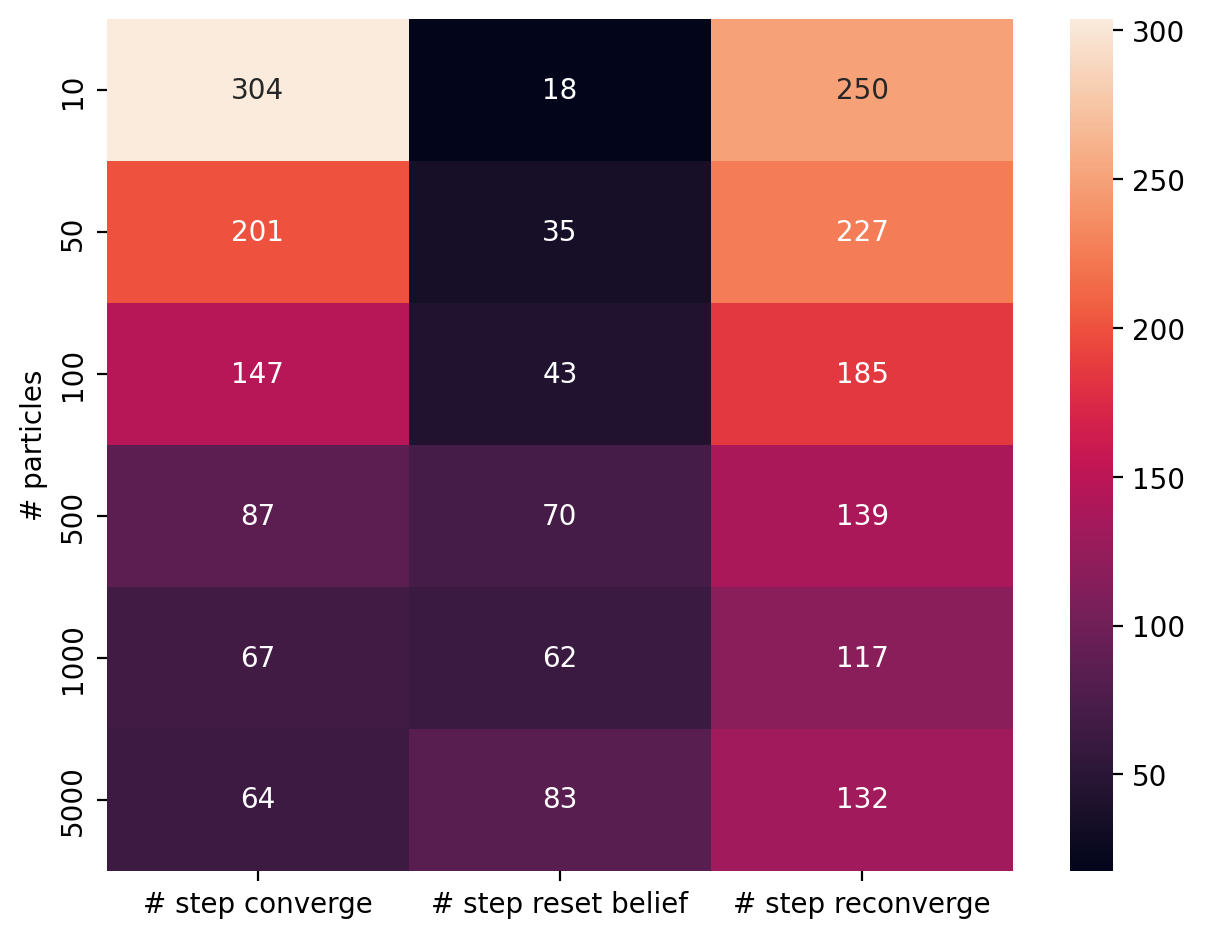

In [6]:
ns_particles = [10, 50, 100, 500, 1000, 5000]
data_PF_avg = np.mean(data_PF, axis=0)
vis_data(data_PF_avg, 
         xticklabels=['# step converge', '# step reset belief', '# step reconverge'], 
         yticklabels=ns_particles)

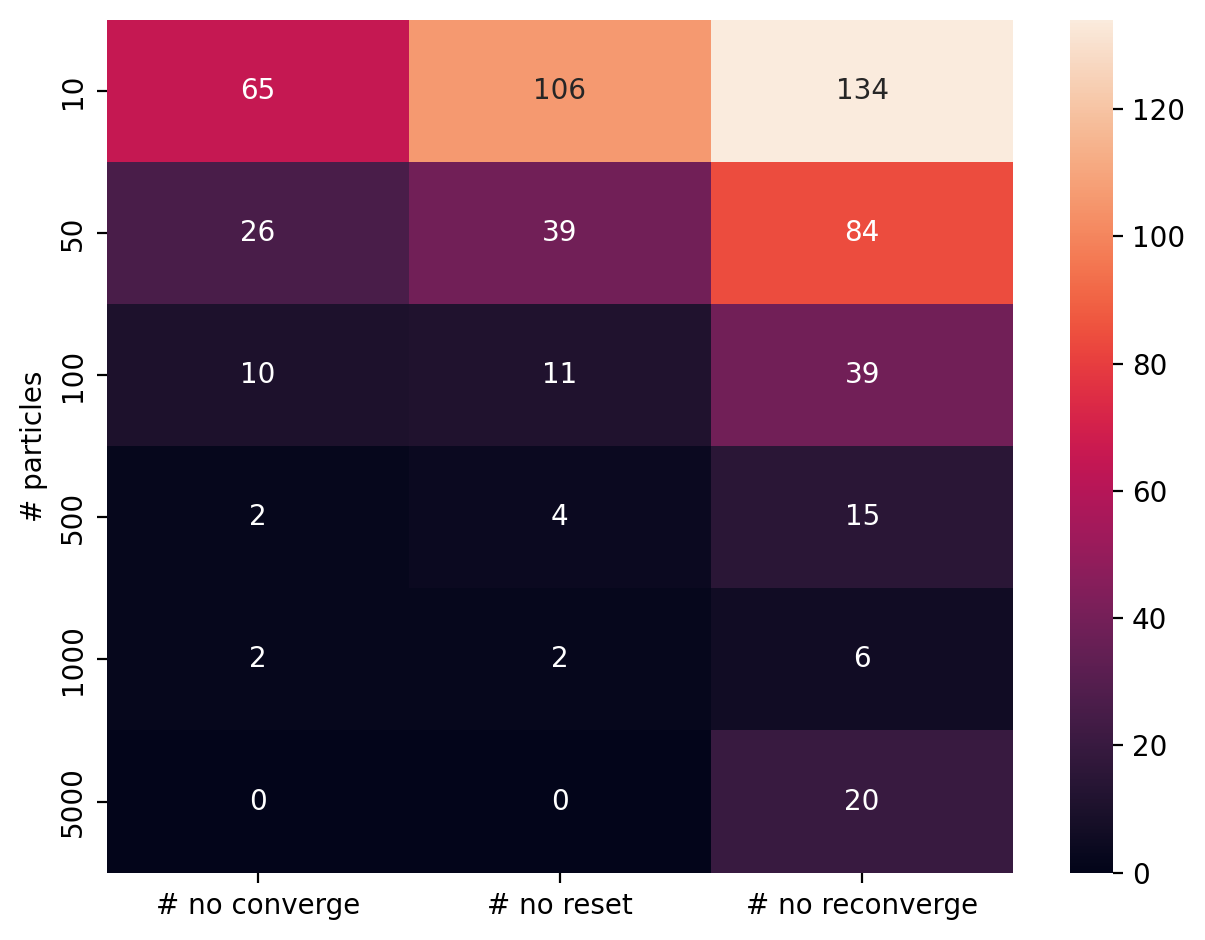

In [7]:
data_PF_extra = format_extra_data_PF(data_PF)
vis_data(data_PF_extra, 
         xticklabels=['# no converge', '# no reset', '# no reconverge'], 
         yticklabels=ns_particles)

In [8]:
data_KF = np.load('KF_n1000.npy')
print(data_KF.shape)

(1000, 3)


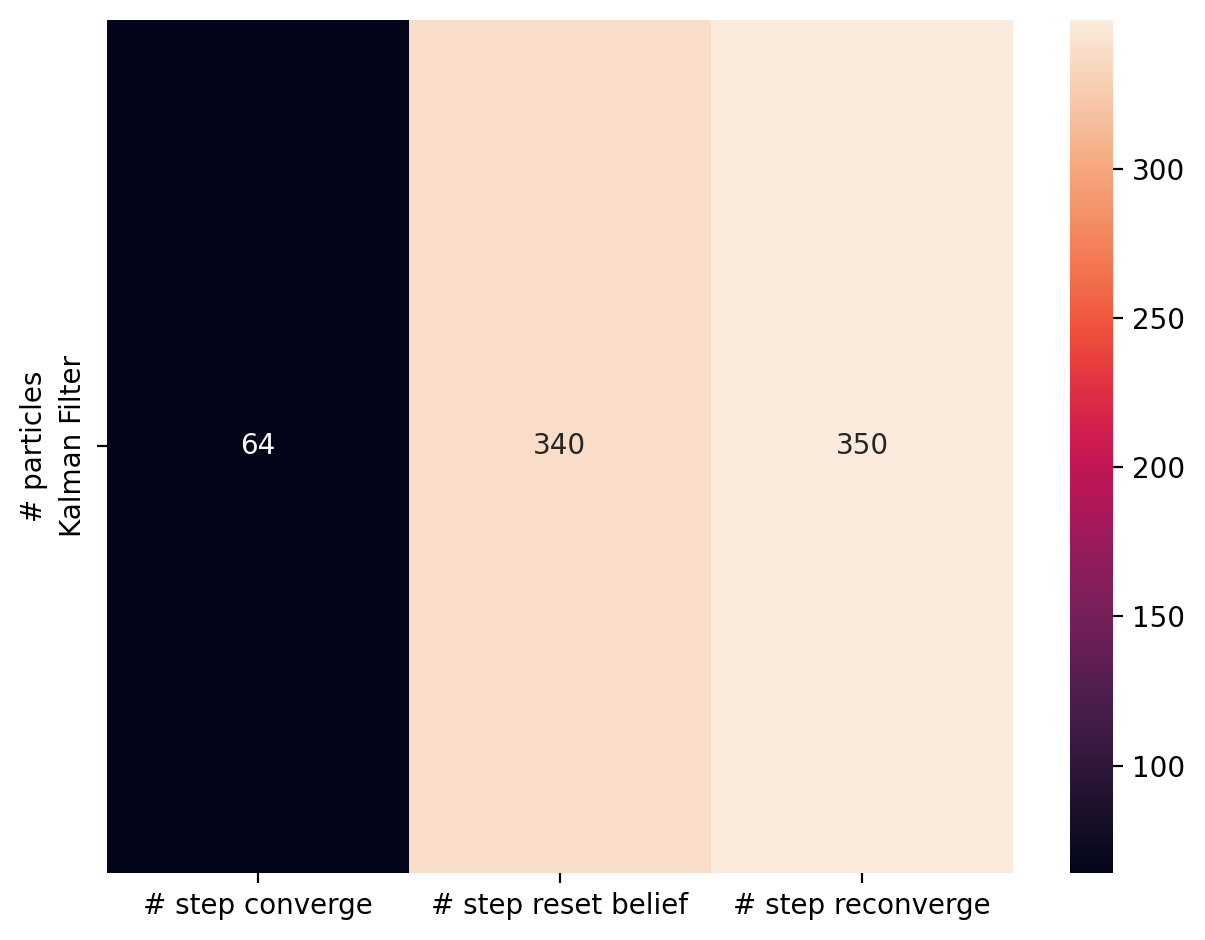

In [9]:
data_KF_avg = np.mean(data_KF, axis=0).reshape((1, 3))
vis_data(data_KF_avg, 
         xticklabels=['# step converge', '# step reset belief', '# step reconverge'], 
         yticklabels=['Kalman Filter'])

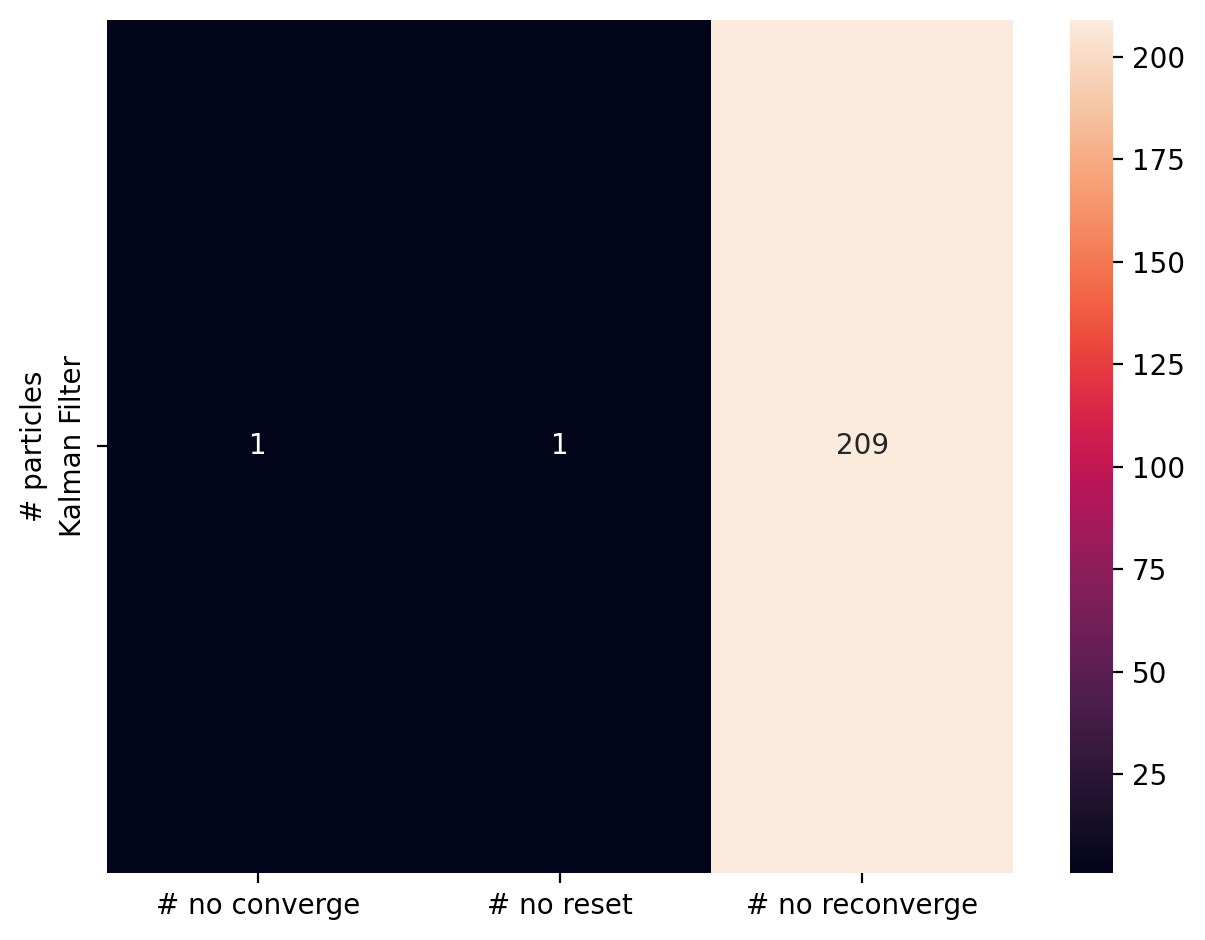

In [20]:
data_KF_extra = format_extra_data_KF(data_KF)
vis_data(data_KF_extra, 
         xticklabels=['# no converge', '# no reset', '# no reconverge'], 
         yticklabels=['Kalman Filter'])

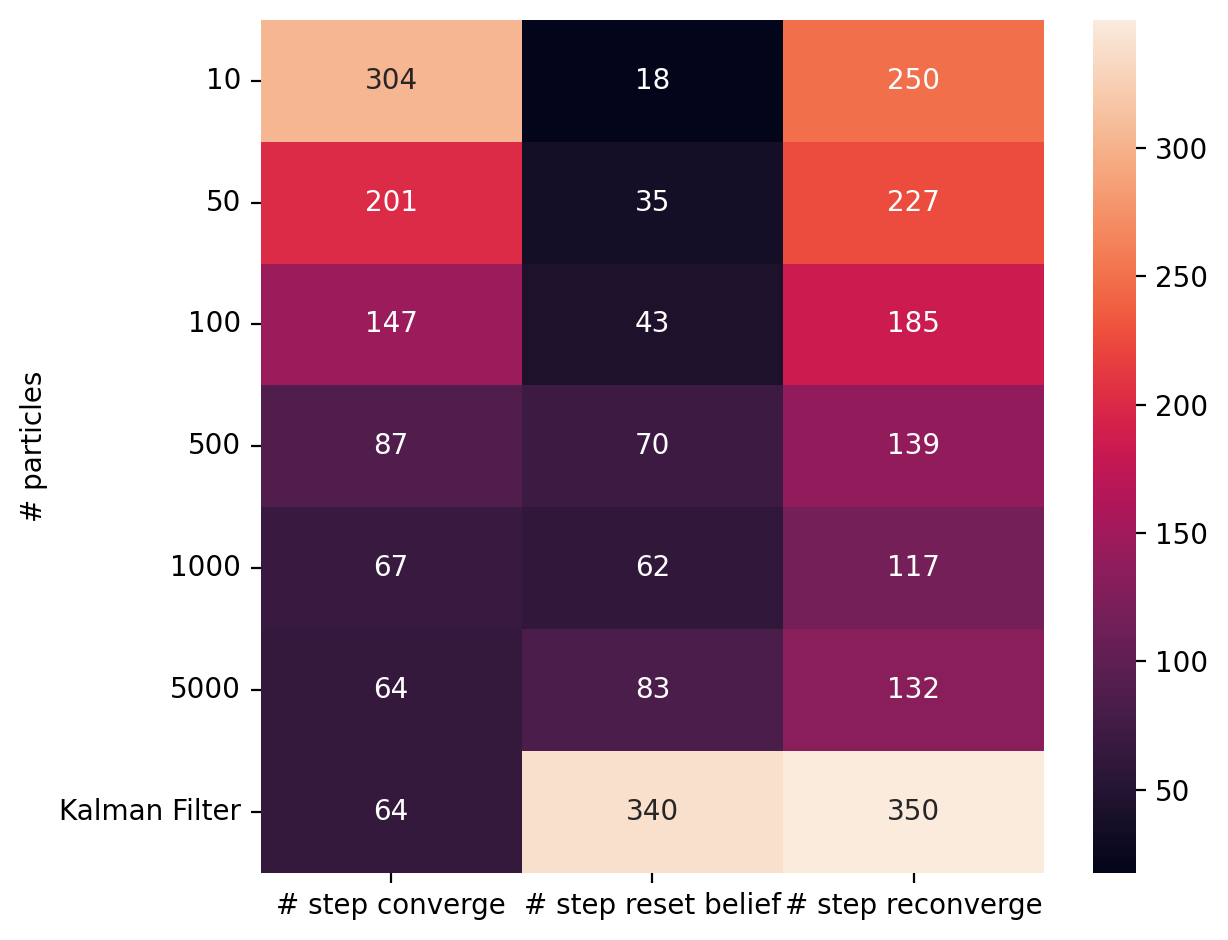

In [21]:
data_PF_KF_avg = np.concatenate((data_PF_avg, data_KF_avg), axis=0)
vis_data(data_PF_KF_avg, 
         xticklabels=['# step converge', '# step reset belief', '# step reconverge'], 
         yticklabels=ns_particles + ['Kalman Filter'])

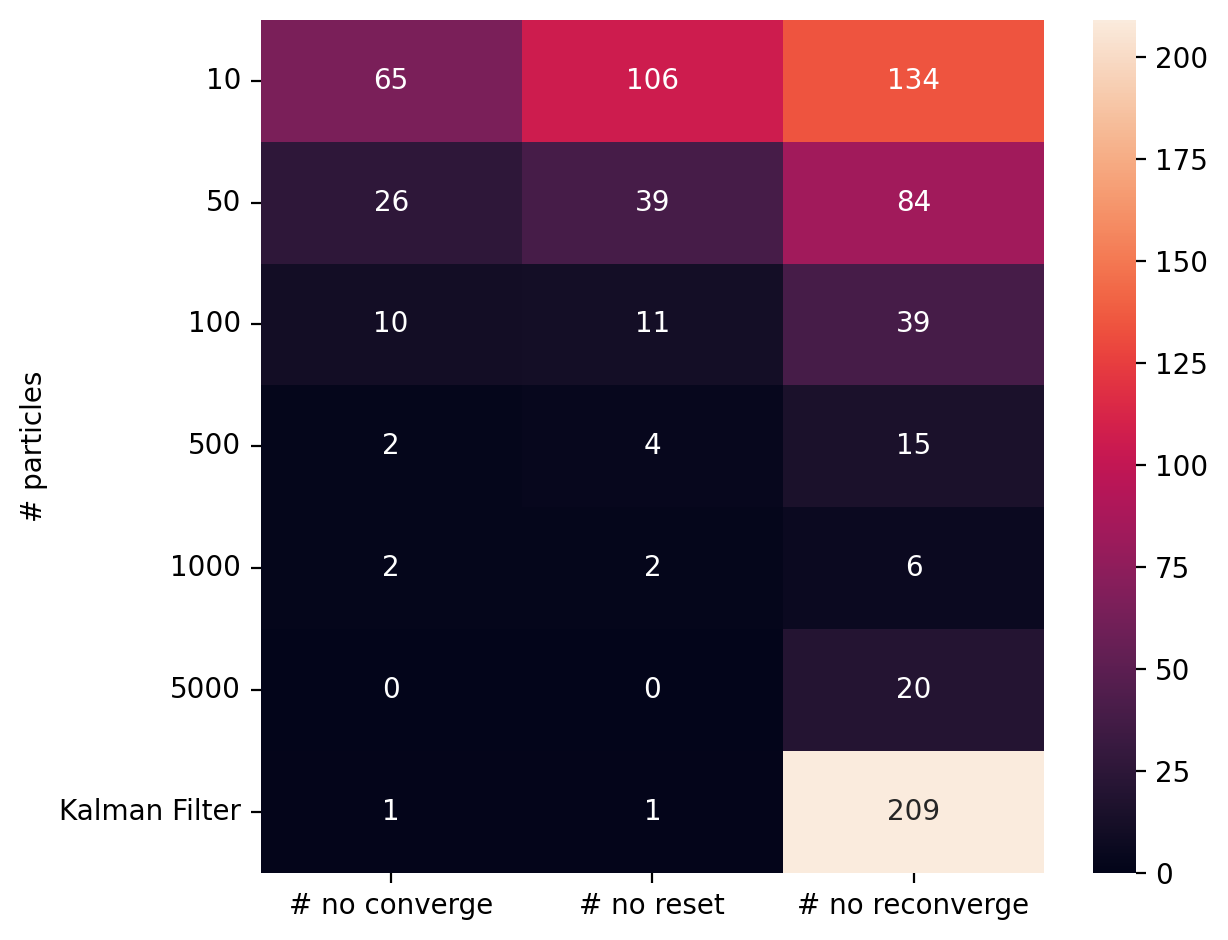

In [22]:
data_PF_KF_extra = np.concatenate((data_PF_extra, data_KF_extra), axis=0)
vis_data(data_PF_KF_extra, 
         xticklabels=['# no converge', '# no reset', '# no reconverge'], 
         yticklabels=ns_particles + ['Kalman Filter'])

In [13]:
data_KF

array([[229., 770., 770.],
       [ 16., 983., 983.],
       [ 41., 765., 806.],
       ...,
       [  2., 463., 534.],
       [ 73., 430., 440.],
       [ 29.,  18.,  24.]])